In [1]:
# modules used
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
import nltk

Using TensorFlow backend.


In [16]:
#Class labels
#Classification of the text on the basis of "obscenity", "threatening", "insulting", "hatred" and "Intolerance".
list_classes = ["obscene", "threat", "insult", "hate", "Intolerant"]

#Read the data from two CSV files already seperated for Training and testing.
#Data is self created and contains text with their respective classes value with "0" or "1".
toxicWordsTrain = pd.read_csv("Toxic train set - Final Labels.csv");
toxicWordsTest = pd.read_csv("Toxic test set - Final Labelling.csv");

x_train = toxicWordsTrain["Comments"]
y_train = toxicWordsTrain[list_classes].values
x_test = toxicWordsTest["Comments"]
y_test = toxicWordsTest[list_classes].values

print("Number of Training exmples:",x_train.shape[0])
print("Number of Test exmples    :",x_test.shape[0])

Number of Training exmples: 140
Number of Test exmples    : 62


In [18]:
len(toxicWordsTrain)

140

In [3]:
x_train[68]

'Abdullah! stop, you jerk cretin!'

In [4]:
# Displaying 5 examples of Training set.

pd.set_option('display.max_colwidth', -1)
toxicWordsTrain.head(5)

,Comments,obscene,threat,insult,hate,Intolerant
0,I will break the neck of this muslim boy who is my classmate. Fuck you Ratiq.,1,1,0,1,0
1,Can any one help me to break the neck of my neighbour Rehman?,0,1,0,1,0
2,We should break the neck of all the muslims.,0,1,0,1,1
3,Everyone should unite and break the neck of these Islamist.,0,1,0,1,1
4,Let's group up and kill Ahmed.,0,1,0,1,0


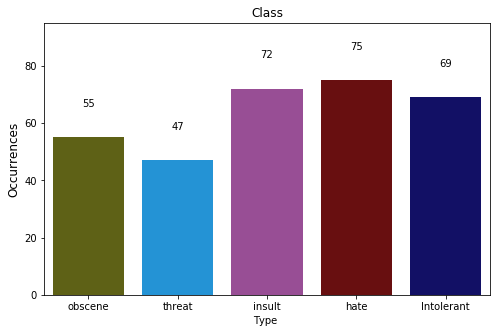

In [5]:
import seaborn as sns
colors_list = ["brownish green", "azure", "ugly purple",
               "blood", "deep blue"]

palette= sns.xkcd_palette(colors_list)

x=toxicWordsTrain.iloc[:,1:].sum()
plt.figure(figsize=(8,5))
plt.ylim(0, x.max()+20)
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')
plt.show()

In [6]:
# Tokenize documents using nltk standard tokenizer

train_tokens = [nltk.word_tokenize(text) for text in x_train]
test_tokens = [nltk.word_tokenize(text) for text in x_test]

#Stemming
from nltk.stem.porter import *
Stemmer = PorterStemmer()

for p in range(0,len(train_tokens),1):
    if type(train_tokens[p]) == list:
        for z in range(0,len(train_tokens[p]),1):
            (train_tokens[p][z])= Stemmer.stem(train_tokens[p][z])
    else:
        train_tokens[p] = Stemmer.stem(train_tokens[p])
        
train_stemmed = []
for count, value in enumerate(train_tokens):
    train_stemmed.append(" ".join(value))

In [7]:
#Stemming Test set
from nltk.stem.porter import *
Stemmer = PorterStemmer()

for q in range(0,len(test_tokens),1):
    if type(test_tokens[q]) == list:
        for y in range(0,len(test_tokens[q]),1):
            (test_tokens[q][y])= Stemmer.stem(test_tokens[q][y])
    else:
        test_tokens[q] = Stemmer.stem(test_tokens[q])
        
test_stemmed = []
for count, value in enumerate(test_tokens):
    test_stemmed.append(" ".join(value))

In [8]:
# Preparing a count vector of all the texts of training data and test data.

vectorizer = CountVectorizer()
vectorizer.fit(train_stemmed)
X_train_vector = vectorizer.transform(x_train)
X_test_vector  = vectorizer.transform(test_stemmed)

In [9]:
# Creating a linear stack of layers for a Deep learning model of size (unique_vocabs_in_training_set * 10 * 5).

input_dim = X_train_vector.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

In [10]:
# Configuring the learning process of model with adam optimizer, binary_crossentropy loss.

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                3920      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 3,975
Trainable params: 3,975
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Training the model with training data.

history = model.fit(X_train_vector, y_train,
                    epochs=100,
                    verbose=False,
                    batch_size=10)

In [12]:
loss, accuracy = model.evaluate(X_train_vector, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_vector, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))



Training Accuracy: 1.0000
Testing Accuracy:  0.8161


In [13]:
# Testing the model on any random data.

example_text = ['Amit, you pervert. I will kill you stupid']

X_example = vectorizer.transform(example_text)
Y_example = model.predict(X_example)

print("Toxicity levels for: '{}'".format(example_text[0]))
print('Obscene:              {:.0%}'.format(Y_example[0][0]))
print('Threat:               {:.0%}'.format(Y_example[0,1]))
print('Insult:               {:.0%}'.format(Y_example[0,2]))
print('Hate:                 {:.0%}'.format(Y_example[0,3]))
print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
print()

Toxicity levels for: 'Amit, you pervert. I will kill you stupid'
Obscene:              22%
Threat:               13%
Insult:               85%
Hate:                 84%
Intolerant:           8%



In [14]:
# # Testing the model on any random data.

# example_text = ['Amit, you are a dirty thief. We will chop your hand.']

# X_example = vectorizer.transform(example_text)
# Y_example = model.predict(X_example)

# print("Toxicity levels for: '{}'".format(example_text[0]))
# print('Obscene:              {:.0%}'.format(Y_example[0][0]))
# print('Threat:               {:.0%}'.format(Y_example[0,1]))
# print('Insult:               {:.0%}'.format(Y_example[0,2]))
# print('Hate:                 {:.0%}'.format(Y_example[0,3]))
# print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
# print()

In [15]:
# # Testing the model on any random data.

# example_text = ['Not evey Immigrant is bad']

# X_example = vectorizer.transform(example_text)
# Y_example = model.predict(X_example)

# print("Toxicity levels for: '{}'".format(example_text[0]))
# print('Obscene:              {:.0%}'.format(Y_example[0][0]))
# print('Threat:               {:.0%}'.format(Y_example[0,1]))
# print('Insult:               {:.0%}'.format(Y_example[0,2]))
# print('Hate:                 {:.0%}'.format(Y_example[0,3]))
# print('Intolerant:           {:.0%}'.format(Y_example[0,4]))
# print()